In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas_bokeh
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Creando dataframes

In [2]:
nba = pd.read_csv('nba_contracts_history.csv')

In [3]:
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


Seleccionaremos las siguientes columnas para estudiar el fenómeno del salario de un jugador de la nba:

In [4]:
nba = nba[['NAME','CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN','+/-']].drop_duplicates()

En general, en el mundo del deporte se le otorga un alto sueldo a los mejores jugadores de cada equipo según lo que ellos le entregan a su equipo tanto dentro como fuera del campo. Vamos a ordenar los contratos de la base de datos según la columna AVG_SALARY para. Si tomamos los primeros 5 en orden descendente podemos notar lo siguiente:

In [5]:
nba.sort_values(by=['AVG_SALARY'],ascending = False).head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-
99,Kevin Durant,2018,2019,3.359950e+07,29.0,68.0,49.0,19.0,2325.0,351.0
152,LeBron James,2016,2017,3.212458e+07,31.0,76.0,56.0,20.0,2709.0,618.0
17,Kyle Lowry,2017,2019,3.163333e+07,31.0,60.0,36.0,24.0,2244.0,356.0
116,Gordon Hayward,2017,2020,3.121430e+07,27.0,73.0,46.0,27.0,2516.0,347.0
88,James Harden,2016,2019,3.090212e+07,26.0,82.0,41.0,41.0,3125.0,124.0


In [6]:
nba.sort_values(by=['AVG_SALARY']).head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-
30,E'Twaun Moore,2012,2013,823244.0,23.0,38.0,24.0,14.0,331.0,31.0
44,Quinn Cook,2017,2018,867391.5,24.0,14.0,9.0,5.0,187.0,-41.0
163,Christian Wood,2016,2017,874636.0,20.0,17.0,0.0,17.0,145.0,-49.0
134,Justin Holiday,2015,2016,981486.0,26.0,59.0,49.0,10.0,657.0,-13.0
133,E'Twaun Moore,2014,2015,981792.0,25.0,79.0,22.0,57.0,1506.0,-147.0


Podemos notar que, en general, los jugadores peores pagados poseen menos minutos jugados y peor métrica de la columna "+/-", que hace referencia a lo que aporta un jugador a su equipo. También, los jugadores más jovenes pareciera que ganan menos que los experimentados. Analizando la correlación de las variables nos podemos encontrar que lo siguiente:

In [7]:
nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']].corr()

,AVG_SALARY,AGE,GP,W,L,MIN,+/-
AVG_SALARY,1.000000,0.163384,0.321118,0.440450,-0.011722,0.650799,0.511799
AGE,0.163384,1.000000,0.187314,0.192270,0.065215,0.218862,0.118044
GP,0.321118,0.187314,1.000000,0.742204,0.664951,0.789263,0.165053
W,0.440450,0.192270,0.742204,1.000000,-0.007015,0.618043,0.659790
L,-0.011722,0.065215,0.664951,-0.007015,1.000000,0.488881,-0.489038
MIN,0.650799,0.218862,0.789263,0.618043,0.488881,1.000000,0.331420
+/-,0.511799,0.118044,0.165053,0.659790,-0.489038,0.331420,1.000000


In [8]:
nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']].corr()['AVG_SALARY']['MIN']

0.6507994303846676

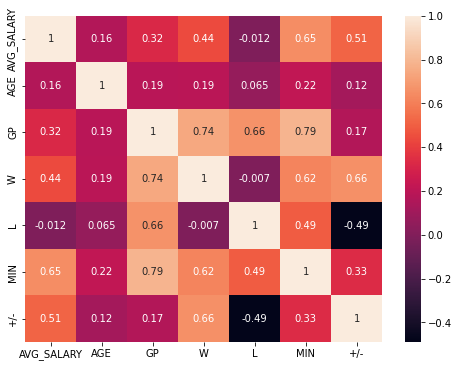

In [9]:
corr_df = nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Covarianza

In [10]:
nba['AVG_SALARY'].describe()

count    1.980000e+02
mean     1.112516e+07
std      7.884209e+06
min      8.232440e+05
25%      4.767000e+06
50%      9.553750e+06
75%      1.639436e+07
max      3.359950e+07
Name: AVG_SALARY, dtype: float64

In [11]:
nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']].cov()

,AVG_SALARY,AGE,GP,W,L,MIN,+/-
AVG_SALARY,6.216075e+13,3.666938e+06,4.884634e+07,5.004138e+07,-1.195043e+06,3.983955e+09,9.205679e+08
AGE,3.666938e+06,8.103497e+00,1.028765e+01,7.887197e+00,2.400451e+00,4.837437e+02,7.666187e+01
GP,4.884634e+07,1.028765e+01,3.722353e+02,2.063510e+02,1.658843e+02,1.182332e+04,7.264898e+02
W,5.004138e+07,7.887197e+00,2.063510e+02,2.076581e+02,-1.307081e+00,6.915159e+03,2.169096e+03
L,-1.195043e+06,2.400451e+00,1.658843e+02,-1.307081e+00,1.671914e+02,4.908163e+03,-1.442606e+03
MIN,3.983955e+09,4.837437e+02,1.182332e+04,6.915159e+03,4.908163e+03,6.028625e+05,5.870643e+04
+/-,9.205679e+08,7.666187e+01,7.264898e+02,2.169096e+03,-1.442606e+03,5.870643e+04,5.204709e+04


In [12]:
nba2 = nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']]
nba2['AVG_SALARY'].cov(nba2['MIN'])

3983954974.189517

## Tema 4
Coloca un cuarto punto que corresponda a tablas de frecuencia. Y como ejemplo coloca en las columnas la edad (en intervalos) y en las filas el salario (en intervalos)… en la matriz va la cantidad de jugadores que calzan en la combinación (salario,edad)….

In [13]:
nba['AVG_SALARY'].describe()

count    1.980000e+02
mean     1.112516e+07
std      7.884209e+06
min      8.232440e+05
25%      4.767000e+06
50%      9.553750e+06
75%      1.639436e+07
max      3.359950e+07
Name: AVG_SALARY, dtype: float64

In [14]:
nba['AGE'].describe()

count    198.000000
mean      25.944444
std        2.846664
min       20.000000
25%       24.000000
50%       25.000000
75%       28.000000
max       36.000000
Name: AGE, dtype: float64

In [15]:
def salarios(salario):
    if (salario<=4767000):
        return '1'
    elif(salario<=9553750):
        return '2'
    elif (salario<=16394360):
        return '3'
    elif (salario<=33599500):
        return '4'
def edades(edad):
    if (edad<=22):
        return '1'
    elif(edad<=25):
        return '2'
    elif (edad<=30):
        return '3'
    elif (edad<=36):
        return '4'
nba['Clasif salario'] = nba['AVG_SALARY'].apply(salarios)
nba['Clasif edad'] = nba['AGE'].apply(edades)


In [16]:
tabla_frecuencia = pd.crosstab(index = nba["Clasif salario"], columns = nba["Clasif edad"])
tabla_frecuencia

Clasif edad,1,2,3,4
Clasif salario,,,,
1,6,22,18,5
2,1,24,18,5
3,4,28,14,3
4,1,17,29,3


In [17]:
tabla_frecuencia = tabla_frecuencia.set_axis(['[823244-4767000]','[4767001-9553750]',
                '[9553751-16394360]','[16394361-33599500]'], axis='index').set_axis(['[20-22]'
                ,'[23-25]','[26-30]','[31-36]'],axis='columns')

In [18]:
tabla_frecuencia

,[20-22],[23-25],[26-30],[31-36]
[823244-4767000],6,22,18,5
[4767001-9553750],1,24,18,5
[9553751-16394360],4,28,14,3
[16394361-33599500],1,17,29,3


## Pregunta formativa 1

Código para contar la cantidad de jugadores de más de 30 años que ganan más de 1MMUSD

In [19]:
player_30 = nba.loc[(nba["AGE"]>30)&(nba['AVG_SALARY']>1000000), "NAME"].count()
print(f'La cantidad de jugadores mayores de 30 años que ganan más de 1MMUSD es:{player_30}')

La cantidad de jugadores mayores de 30 años que ganan más de 1MMUSD es:16


## Pregunta formativa 2 

Código para calcular la diferencia en el promedio de minutos jugados entre los jugadores que ganaron más de 50 partidos y los que ganaron menos de 30.

In [20]:
more_50 = nba[(nba['W']>50)]
less_30 = nba[(nba['L']<30)]
min_50 = more_50['MIN'].mean()
min_30 = less_30['MIN'].mean()
print(f'La diferencia en el promedio de minutos jugados es de {min_50-min_30}')

La diferencia en el promedio de minutos jugados es de 838.098947368421
